In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.fft import fft
import oct2py
%load_ext oct2py.ipython

In [3]:
data=pd.read_csv('dataset1.csv')
data.head()

,d,f1,f2,t0
0,0.631189,5.631189,2.931189,0.0
1,0.355074,6.394632,3.365813,0.1
2,0.997003,8.030686,4.648909,0.2
3,0.224171,8.163098,4.384911,0.3
4,0.652451,9.368175,5.139881,0.4


In [4]:
d=data[['d']]
f1=data[['f1']]
f2=data[['f2']]
t0=data[['t0']]

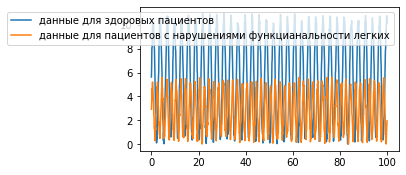

In [5]:
fig1 = plt.figure()
ax = fig1.add_axes([0.1, 0.1, 0.6 ,0.5])
ax.plot(t0,f1, label = 'данные для здоровых пациентов')
ax.plot(t0,f2, label = 'данные для пациентов c нарушениями функцианальности легких')
plt.legend()

/home/user/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  from ipykernel import kernelapp as app
/home/user/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


Text(0, 0.5, 'амплитуда')

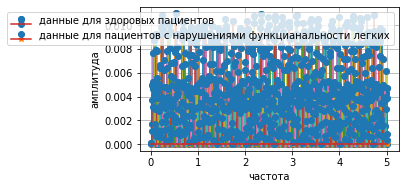

In [6]:
Fd, N = 10,1000
T=1/Fd
z1= f1-np.mean(f1)
z2= f2-np.mean(f2)
Y=fft(z1)
P2=abs(Y/N)
k=(N/2)+1
k=int(k)
P1 = P2[0:k]
P1[1:-2]=2*P1[1:-2]
k2=(np.arange(1,k+1))/N
f = Fd*k2
fig2 = plt.figure()
ax2 = fig2.add_axes([0.1, 0.1, 0.6, 0.5])
ax2.stem(f,P1,'-o',label = 'данные для здоровых пациентов',use_line_collection=False);

Y2 = fft(z2);
P4 = abs(Y2/N);
k3=(N/2)+1
k3=int(k3)
P3 = P4[0:k3];
P3[1:-2] = 2*P3[1:-2]
k4=(np.arange(1,k3+1))/N
f2 = Fd*k4
ax2.stem(f2, P3,'-*' ,label ='данные для пациентов c нарушениями функцианальности легких',use_line_collection=False)
plt.legend()
plt.grid()
plt.xlabel('частота')
plt.ylabel('амплитуда')

In [7]:
import panel as pn
pn.extension()
from panel.template import DarkTheme
#Layout using Template
template = pn.template.FastListTemplate(theme=DarkTheme,
    title ='Health Report',
    main=[pn.Row(' # Device 1', pn.Spacer(width = 20),
                 pn.Column('### Plot 1',pn.Spacer(width = 10),fig1,height=300,width=350),
                 pn.Column('### Plot 2', fig2,pn.Spacer(width = 10),height=300, width=350),
                 height=350, width=800
                 ),
          pn.Row('# Device 2', 
                 pn.Column( '### Plot 1',fig1,pn.Spacer(width = 20),height=200, width=180),
                 pn.Column(fig1,pn.Spacer(width = 20)),
                 pn.Column(fig1,pn.Spacer(width = 20)), 
                 pn.Column(fig1,pn.Spacer(width = 20)),
                 height=350, width=800
                 )],
    accent_base_color="#88d8b0",
    header_background="#88d8b0",
)
# template.show()
template.servable();
print('Designing done')

Designing done


In [8]:
template.show()

Launching server at http://localhost:38175


In [22]:
from bokeh.plotting import figure

p1 = figure(height=350, width = 200,sizing_mode='stretch_width')
p2 = figure(height=350, width = 200,sizing_mode='stretch_width')
p3 = figure(height=350, width = 200,sizing_mode='stretch_width')
p4 = figure(height=350, width = 200,sizing_mode='stretch_width')

p1.line([1, 2, 3], [1, 2, 3])
p2.circle([1, 2, 3], [1, 2, 3])
p3.square([1, 2, 3], [1, 2, 3])
p4.circle([1, 2, 3], [1, 2, 3])


pn.Row(p1, p2,p3,p4)

Row
    [0] Bokeh(Figure)
    [1] Bokeh(Figure)
    [2] Bokeh(Figure)
    [3] Bokeh(Figure)

In [24]:
w1 = pn.widgets.TextInput(name='SaO2', value='90.06',width = 150, align = 'center')
w1

TextInput(align='center', name='SaO2', value='90.06', width=150)

In [25]:
def showReport(p1,p2,p3,p4,p5,p6,wig):
    import panel as pn
    pn.extension()

    template = pn.template.FastListTemplate(title ='Health Report',
    main=[pn.Row('## Spirometer',
                 p1,pn.Spacer(width = 10), 
                 p2, 
                 sizing_mode='stretch_width',height = 350, width = 850,background='#f0f0f0'),
          
          pn.Row('## Pulse Oximeter',
                 p3,pn.Spacer(width = 10),
                 p4,pn.Spacer(width = 10),
                 p5,pn.Spacer(width = 10),
                 p6,pn.Spacer(width = 10),
                 wig,
                 sizing_mode='stretch_width',
                 height = 350, width = 850)
          ]
      )
    template.servable();
    print('Designing done')
    template.show()

In [26]:
showReport(p1,p2,p1,p2,p3,p4,w1)

Designing done
Launching server at http://localhost:40657
